# State Farm Classification Coding Exercise

## Part 1 - Training Data Set Exploratory Data Analysis and Feature Engineering

### A. Import Libraries and Training Data Set, and Check for Missing Values

** Import numpy and pandas. **

In [1]:
import numpy as np
import pandas as pd

** Import data visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Import Exercise 2 training data set comma-separated (CSV) file into a Pandas dataframe. **

In [3]:
train = pd.read_csv('../State_Farm/Data/exercise_02_train.csv', sep=',')

** Create copy of training dataframe for exploratory data analysis and feature engineering. **

In [4]:
train1 = train.copy()

** View first five rows of training dataframe. **

In [5]:
train1.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,0.198560,74.425320,67.627745,-3.095111,-6.822327,19.048071,-0.362378,-10.699174,-22.699791,-1.561262,...,0.800948,1.553846,asia,-1.093926,16.202557,26.238591,-2.125570,9.644466,1.237667,0
1,-29.662621,24.320711,-48.205182,1.430339,-6.552206,4.263074,6.551412,4.265483,1.245095,2.246814,...,2.031707,7.544422,asia,-3.659541,29.674259,-15.141647,-36.030599,5.820376,1.952183,1
2,15.493759,-66.160459,50.512903,-2.265792,14.428578,2.509323,-6.707536,3.820842,-11.100833,-1.459825,...,-0.992474,1.385799,america,1.299144,33.018090,-19.914894,26.212736,2.372690,0.558988,1
3,-19.837651,33.210943,53.405563,1.079462,11.364251,-1.064581,9.308857,9.266076,14.552959,-2.012755,...,-1.157845,6.036804,asia,0.521396,9.664095,-27.197636,19.221130,13.382712,0.214462,0
4,11.896655,-26.717872,-17.758176,1.692017,21.553537,-5.852097,-0.857435,-2.186940,18.075272,-1.404618,...,-3.045511,-1.719337,asia,1.526071,-25.608326,33.383803,-5.703269,-11.023730,-1.191319,0


** Obtain number of rows and columns in training dataframe. **

In [6]:
train1.shape

(40000, 101)

** Check for presence of missing values for all features. **

In [7]:
train1.isnull().sum().sort_values(ascending=False)

x96    15
x63    14
x13    14
x18    14
x85    14
x24    14
x62    13
x35    13
x21    13
x69    13
x97    13
x99    13
x42    12
x60    12
x65    12
x73    12
x17    12
x25    11
x51    11
x56    11
x0     11
x55    11
x89    11
x12    11
x86    11
x28    11
x76    10
x75    10
x48    10
x1     10
       ..
x98     6
x5      6
x8      6
x22     6
x79     6
x53     6
x83     5
x20     5
x71     5
x70     5
x64     5
x54     5
x45     5
x29     5
x37     4
x41     4
x91     4
x32     4
x88     4
x30     4
x87     4
x81     4
x47     4
x15     4
x84     3
x14     3
x49     3
x44     2
x43     2
y       0
Length: 101, dtype: int64

### B. Explore and Engineer Numerical Features 

** Identify which training data set features are categorical. **

In [8]:
train1.select_dtypes(exclude=['int64', 'float']).columns

Index(['x34', 'x35', 'x41', 'x45', 'x68', 'x93'], dtype='object')

** Check that the data types for all numerical features are float64. **

In [9]:
num_features = train1.columns.difference(['y', 'x34', 'x35', 'x41', 'x45', 'x68', 'x93'])

In [10]:
train1[num_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 94 columns):
x0     39989 non-null float64
x1     39990 non-null float64
x10    39991 non-null float64
x11    39993 non-null float64
x12    39989 non-null float64
x13    39986 non-null float64
x14    39997 non-null float64
x15    39996 non-null float64
x16    39993 non-null float64
x17    39988 non-null float64
x18    39986 non-null float64
x19    39992 non-null float64
x2     39992 non-null float64
x20    39995 non-null float64
x21    39987 non-null float64
x22    39994 non-null float64
x23    39992 non-null float64
x24    39986 non-null float64
x25    39989 non-null float64
x26    39991 non-null float64
x27    39992 non-null float64
x28    39989 non-null float64
x29    39995 non-null float64
x3     39991 non-null float64
x30    39996 non-null float64
x31    39992 non-null float64
x32    39996 non-null float64
x33    39990 non-null float64
x36    39993 non-null float64
x37    39996 non-null

** View scatter matrix of numerical features to inspect their distributions. **

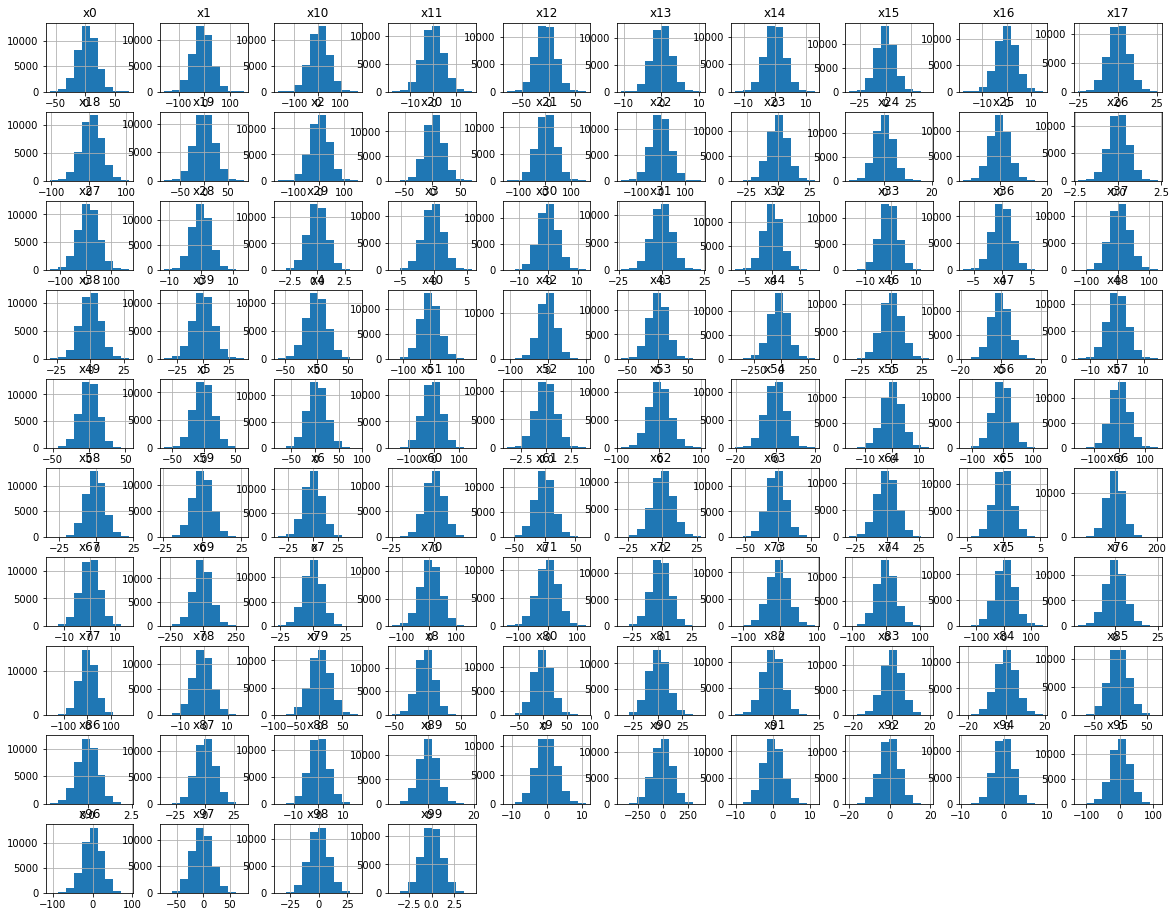

In [11]:
train1[num_features].hist(figsize=(20,16));

* All the numerical features are normally distributed. The number of missing values for each feature ranges from 2 to 15 while the total number of rows in the training data set is 40,000. Given these conditions, I decided to impute the missing values with the mean of the feature. 

** Impute missing values in numerical features with mean. **

In [12]:
train2 = train1.fillna(train1[num_features].mean())

** Check numerical features for any missing values. **

In [13]:
train2[num_features].isnull().sum().sort_values(ascending=False)

x99    0
x42    0
x31    0
x32    0
x33    0
x36    0
x37    0
x38    0
x39    0
x4     0
x40    0
x43    0
x3     0
x44    0
x46    0
x47    0
x48    0
x49    0
x5     0
x50    0
x51    0
x52    0
x30    0
x29    0
x98    0
x18    0
x1     0
x10    0
x11    0
x12    0
      ..
x91    0
x92    0
x94    0
x95    0
x96    0
x97    0
x78    0
x77    0
x76    0
x75    0
x57    0
x58    0
x59    0
x6     0
x60    0
x61    0
x62    0
x63    0
x64    0
x65    0
x66    0
x67    0
x69    0
x7     0
x70    0
x71    0
x72    0
x73    0
x74    0
x0     0
Length: 94, dtype: int64

** View scatter matrix of imputed numerical features to check if the mean imputations skewed their distributions. **

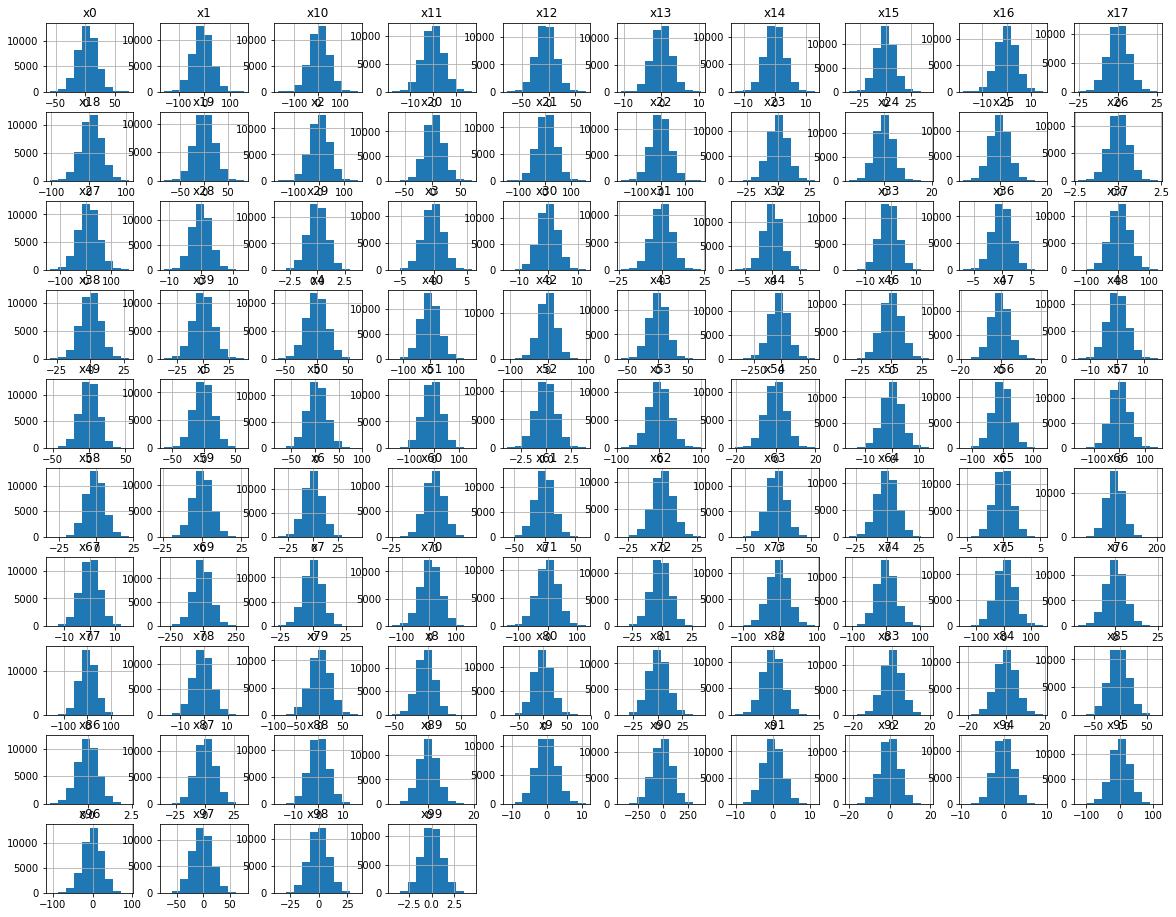

In [14]:
train2[num_features].hist(figsize=(20,16));

* The histograms for all the numerical features show that their distributions still continue to remain normal after imputing their missing values with the mean.

### C. Explore and Engineer Categorical Features

** Check categorical feature data types. **

In [15]:
cat_features1 = ['y', 'x34', 'x35', 'x41', 'x45', 'x68', 'x93']

In [16]:
train2[cat_features1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
y      40000 non-null int64
x34    39993 non-null object
x35    39987 non-null object
x41    39996 non-null object
x45    39995 non-null object
x68    39992 non-null object
x93    39993 non-null object
dtypes: int64(1), object(6)
memory usage: 2.1+ MB


** View summary statistics for categorical features. **

In [17]:
train2.describe(include=['object'])

,x34,x35,x41,x45,x68,x93
count,39993,39987,39996,39995,39992,39993
unique,10,8,37863,10,12,3
top,volkswagon,wed,$-712.34,-0.01%,July,asia
freq,12455,14793,4,9578,11080,35416


** Convert currency and percent string features (x41 and x45) to float data type. **

In [18]:
train2[['x41_flt']] = train2[['x41']].apply(lambda x: x.str.replace('$','')).astype(float)
train2[['x45_pct']] = train2[['x45']].apply(lambda x: x.str.replace('%','')).astype(float)
train3 = train2.drop(['x41', 'x45'], axis=1)

** Check the number of missing values for the numerical x41 and x45 features. **

In [19]:
train3[['x41_flt', 'x45_pct']].isnull().sum()

x41_flt    4
x45_pct    5
dtype: int64

** View scatter matrix of numerical x41 and x45 features to inspect their distributions. **

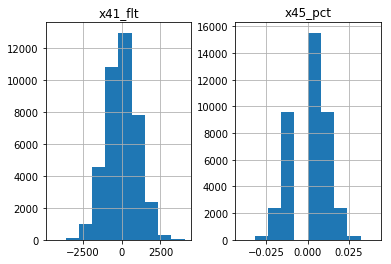

In [20]:
train3[['x41_flt', 'x45_pct']].hist();

* The numerical x41 and x45 features are normally distributed. The number of missing values for the numerical x41 and x45 features is 4 and 5, respectively. Again, the total number of rows in the training data set is 40,000. Given these conditions, I decided to impute the missing values with the mean of the feature.

** Impute missing values in numerical x41 and x45 features with mean. **

In [21]:
train4 = train3.fillna(train3[['x41_flt', 'x45_pct']].mean())

** View scatter matrix of imputed numerical x41 and x45 features to check if the mean imputations skewed their distributions. **

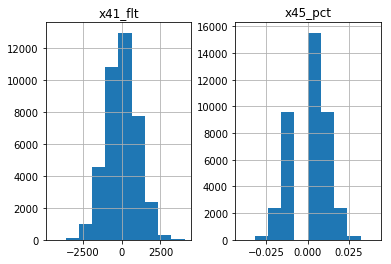

In [22]:
train4[['x41_flt', 'x45_pct']].hist();

* The histograms for the numerical x41 and x45 features show that their distributions still continue to remain normal after imputing their missing values with the mean.

** Check for features that still have missing values. **

In [23]:
train4.isnull().sum().sort_values(ascending=False).head()

x35        13
x68         8
x93         7
x34         7
x45_pct     0
dtype: int64

** Identify remaining categorical features. **

In [24]:
train4.select_dtypes(exclude=['int64', 'float']).columns

Index(['x34', 'x35', 'x68', 'x93'], dtype='object')

** View bar plots for categorical features of x34, x35, x68, and x93. **

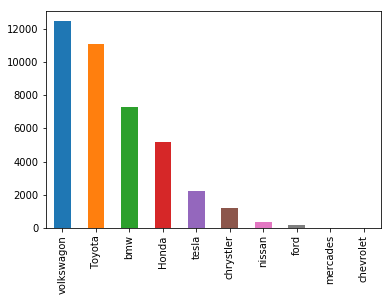

In [25]:
train4.x34.value_counts().plot(kind='bar');

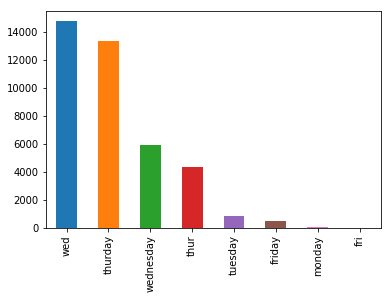

In [26]:
train4.x35.value_counts().plot(kind='bar');

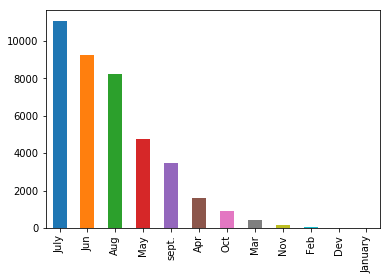

In [27]:
train4.x68.value_counts().plot(kind='bar');

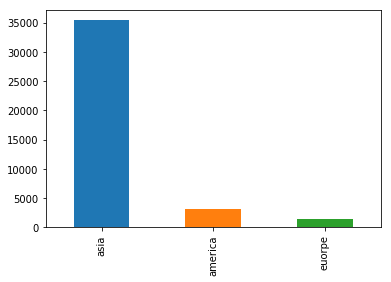

In [28]:
train4.x93.value_counts().plot(kind='bar');

* The missing values for the categorical features of x34, x35, x68, and x93 are truly blank. In other words, much more domain knowledge is required to impute these missing values. Going forward, I will assign these missing values their own missing category.

** Replace all categorical feature missing values with their own missing category. **

In [29]:
train4['x34'] = train4.x34.fillna('No_Car_Make')
train4['x35'] = train4.x35.fillna('No_Weekday')
train4['x68'] = train4.x68.fillna('No_Month')
train4['x93'] = train4.x93.fillna('No_Continent')

** Check that all categorical features have zero missing values. **

In [30]:
train4[['x34', 'x35', 'x68', 'x93']].isnull().sum().sort_values(ascending=False)

x93    0
x68    0
x35    0
x34    0
dtype: int64

** Obtain value counts and y target feature probabilities for each x34 category. **

In [31]:
train4.groupby('x34').y.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
x34,,
ford,159,0.220126
Toyota,11079,0.204982
volkswagon,12455,0.204978
Honda,5179,0.204093
bmw,7282,0.203241
nissan,334,0.200599
tesla,2248,0.194840
chrystler,1219,0.194422
mercades,27,0.148148


** Clean x34 feature car make names, and obtain value counts and y target feature probabilities again. **

In [32]:
train4['x34'] = train4.x34.map({'ford':'Ford', 'Toyota':'Toyota', 'volkswagon':'Volkswagen', 'Honda':'Honda', 'bmw':'BMW', 
                                'nissan':'Nissan', 'tesla':'Tesla', 'chrystler':'Chrysler', 'mercades':'Mercedes', 
                                'No_Car_Make':'No_Car_Make', 'chevrolet':'Chevrolet'})
train4.groupby('x34').y.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
x34,,
Ford,159,0.220126
Toyota,11079,0.204982
Volkswagen,12455,0.204978
Honda,5179,0.204093
BMW,7282,0.203241
Nissan,334,0.200599
Tesla,2248,0.194840
Chrysler,1219,0.194422
Mercedes,27,0.148148


** Create x34 dummy features with Volkswagen as reference category and add it to training dataframe. **

In [33]:
x34_dummies = pd.get_dummies(train4.x34).drop('Volkswagen', axis=1)
train5 = pd.concat([train4, x34_dummies], axis=1)

** Obtain value counts and y target feature probabilities for each x35 category. **

In [34]:
train5.groupby('x35').y.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
x35,,
monday,61,0.426230
tuesday,894,0.347875
fri,24,0.291667
wednesday,5920,0.256757
wed,14793,0.211789
thurday,13375,0.174430
thur,4383,0.165184
friday,537,0.163873
No_Weekday,13,0.153846


** Clean x35 feature weekday names, and obtain value counts and y target feature probabilities again. **

In [35]:
train5['x35'] = train5.x35.map({'monday':'Monday', 'tuesday':'Tuesday', 'fri':'Friday', 'wednesday':'Wednesday', 
                                'wed':'Wednesday', 'thurday':'Thursday', 'thur':'Thursday', 'friday':'Friday', 
                                'No_Weekday':'No_Weekday'})
train5.groupby('x35').y.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
x35,,
Monday,61,0.426230
Tuesday,894,0.347875
Wednesday,20713,0.224642
Thursday,17758,0.172148
Friday,561,0.169340
No_Weekday,13,0.153846


** Create x35 dummy features with Wednesday as reference category and add it to training dataframe. **

In [36]:
x35_dummies = pd.get_dummies(train5.x35).drop('Wednesday', axis=1)
train6 = pd.concat([train5, x35_dummies], axis=1)

** Obtain value counts and y target feature probabilities for each x68 category. **

In [37]:
train6.groupby('x68').y.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
x68,,
Dev,20,0.450000
Feb,56,0.446429
Nov,151,0.377483
January,10,0.300000
Mar,431,0.278422
Oct,904,0.264381
Apr,1614,0.258984
May,4769,0.214930
sept.,3485,0.212052


** Clean x68 feature month names, and obtain value counts and y target feature probabilities again. **

In [38]:
train6['x68'] = train6.x68.map({'Dev':'December', 'Feb':'February', 'Nov':'November', 'January':'January', 'Mar':'March', 
                                'Oct':'October', 'Apr':'April', 'May':'May', 'sept.':'September', 'Jun':'June', 'Aug':'August', 
                                'July':'July', 'No_Month':'No_Month'})
train6.groupby('x68').y.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
x68,,
December,20,0.450000
February,56,0.446429
November,151,0.377483
January,10,0.300000
March,431,0.278422
October,904,0.264381
April,1614,0.258984
May,4769,0.214930
September,3485,0.212052


** Create x68 dummy features with July as reference category and add it to training dataframe. **

In [39]:
x68_dummies = pd.get_dummies(train6.x68).drop('July', axis=1)
train7 = pd.concat([train6, x68_dummies], axis=1)

** Obtain value counts and y target feature probabilities for each x93 category. **

In [40]:
train7.groupby('x93').y.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
x93,,
No_Continent,7,0.285714
america,3131,0.217183
asia,35416,0.202761
euorpe,1446,0.194329


** Clean x93 feature continent names, and obtain value counts and y target feature probabilities again. **

In [41]:
train7['x93'] = train7.x93.map({'No_Continent':'No_Continent', 'america':'America', 'asia':'Asia', 'euorpe':'Europe'})
train7.groupby('x93').y.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
x93,,
No_Continent,7,0.285714
America,3131,0.217183
Asia,35416,0.202761
Europe,1446,0.194329


** Create x93 dummy features with Asia as reference category and add it to training dataframe. **

In [42]:
x93_dummies = pd.get_dummies(train7.x93).drop('Asia', axis=1)
train8 = pd.concat([train7, x93_dummies], axis=1)

### D. Finalize and Export Cleaned Training Data Set for Export

** Drop categorical features from training dataframe. **

In [43]:
train_cleaned = train8.drop(['x34', 'x35', 'x68', 'x93'], axis=1)

** Obtain number of rows and columns in training dataframe with engineered and cleaned features. **

In [44]:
train_cleaned.shape

(40000, 127)

** Check for any remaining missing values in training dataframe with engineered and cleaned features. **

In [45]:
train_cleaned.isnull().sum().sort_values(ascending=False)

No_Continent    0
x50             0
x33             0
x36             0
x37             0
x38             0
x39             0
x40             0
x42             0
x43             0
x44             0
x46             0
x47             0
x48             0
x49             0
x51             0
x31             0
x52             0
x53             0
x54             0
x55             0
x56             0
x57             0
x58             0
x59             0
x60             0
x61             0
x62             0
x63             0
x64             0
               ..
x83             0
x70             0
x71             0
x72             0
x73             0
x74             0
x75             0
x76             0
x77             0
x78             0
x79             0
x80             0
x81             0
x82             0
x84             0
x99             0
x85             0
x86             0
x87             0
x88             0
x89             0
x90             0
x91             0
x92             0
x94       

** Export training dataframe with engineered and cleaned features to CSV file. **

In [46]:
train_cleaned.to_csv('../State_Farm/Data/train_cleaned.csv', sep=',', index=False)

** Save training dataframe with engineered and cleaned features to pickle file for subsequent feature selection notebook. **

In [47]:
train_cleaned.to_pickle('../State_Farm/Data/train_cleaned.pickle')